Epoch [20/200], Pérdida: 0.0338
Epoch [40/200], Pérdida: 0.0282
Epoch [60/200], Pérdida: 0.0238
Epoch [80/200], Pérdida: 0.0197
Epoch [100/200], Pérdida: 0.0163
Epoch [120/200], Pérdida: 0.0140
Epoch [140/200], Pérdida: 0.0125
Epoch [160/200], Pérdida: 0.0117
Epoch [180/200], Pérdida: 0.0113
Epoch [200/200], Pérdida: 0.0111


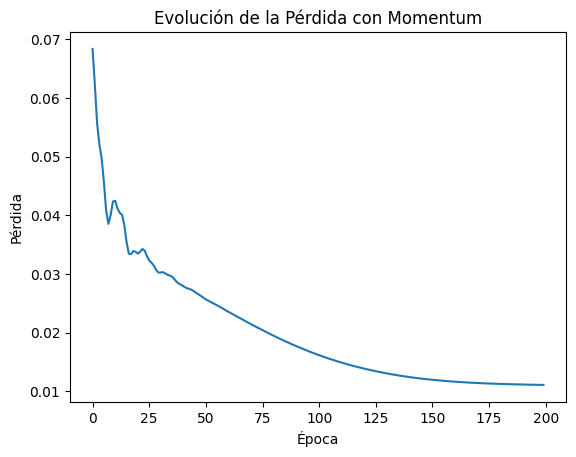

In [1]:
import torch
import matplotlib.pyplot as plt

# Generar datos sintéticos
torch.manual_seed(0)
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = X.pow(3) + 0.1 * torch.randn(X.size())  # y = x^3 + ruido

# Definir el modelo
model = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)

# Función de pérdida
criterion = torch.nn.MSELoss()

# Optimizador con Momentum
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# Entrenamiento
num_epochs = 200
losses = []

for epoch in range(num_epochs):
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Pérdida: {loss.item():.4f}')

# Visualización de la pérdida
plt.plot(range(num_epochs), losses)
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida con Momentum')
plt.show()


In [2]:
# Optimizador AdaGrad
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.1)


In [3]:
# Optimizador RMSProp
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9)


In [4]:
# Optimizador Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



Entrenando con SGD
Epoch [50/200], Pérdida: 0.0357
Epoch [100/200], Pérdida: 0.0320
Epoch [150/200], Pérdida: 0.0288
Epoch [200/200], Pérdida: 0.0261

Entrenando con Momentum
Epoch [50/200], Pérdida: 0.0236
Epoch [100/200], Pérdida: 0.0139
Epoch [150/200], Pérdida: 0.0114
Epoch [200/200], Pérdida: 0.0110

Entrenando con AdaGrad
Epoch [50/200], Pérdida: 0.0355
Epoch [100/200], Pérdida: 0.0314
Epoch [150/200], Pérdida: 0.0239
Epoch [200/200], Pérdida: 0.0162

Entrenando con RMSProp
Epoch [50/200], Pérdida: 0.0161
Epoch [100/200], Pérdida: 0.0149
Epoch [150/200], Pérdida: 0.0143
Epoch [200/200], Pérdida: 0.0137

Entrenando con Adam
Epoch [50/200], Pérdida: 0.0363
Epoch [100/200], Pérdida: 0.0276
Epoch [150/200], Pérdida: 0.0203
Epoch [200/200], Pérdida: 0.0149


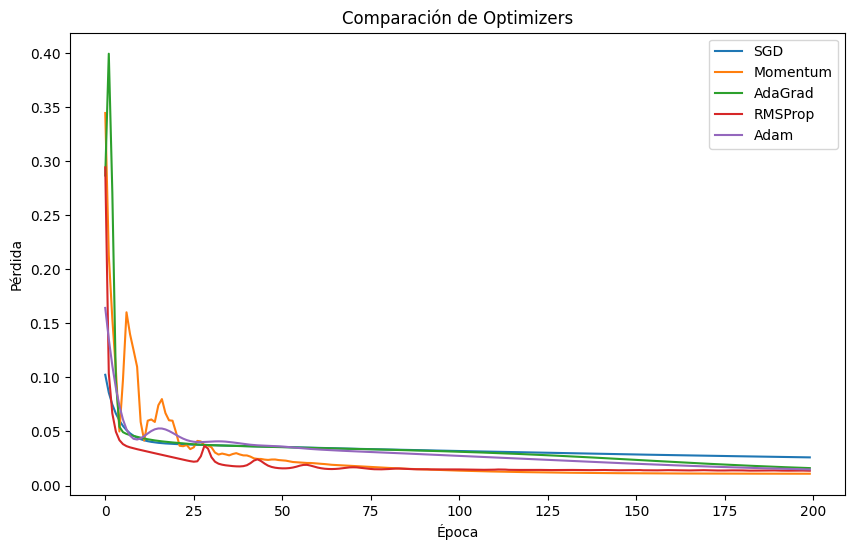

In [5]:
import torch
import matplotlib.pyplot as plt

# Generar datos sintéticos
torch.manual_seed(0)
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = X.pow(3) + 0.1 * torch.randn(X.size())

# Definir el modelo
model = torch.nn.Sequential(
    torch.nn.Linear(1, 20),
    torch.nn.ReLU(),
    torch.nn.Linear(20, 1)
)

# Función de pérdida
criterion = torch.nn.MSELoss()

# Lista de optimizadores
optimizers = {
    'SGD': torch.optim.SGD(model.parameters(), lr=0.1),
    'Momentum': torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9),
    'AdaGrad': torch.optim.Adagrad(model.parameters(), lr=0.1),
    'RMSProp': torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9),
    'Adam': torch.optim.Adam(model.parameters(), lr=0.01)
}

# Almacenar pérdidas
loss_histories = {}

# Entrenamiento con diferentes optimizadores
for name, optimizer in optimizers.items():
    print(f'\nEntrenando con {name}')
    # Reiniciar pesos del modelo
    model.apply(lambda m: m.reset_parameters() if hasattr(m, 'reset_parameters') else None)

    losses = []
    for epoch in range(200):
        outputs = model(X)
        loss = criterion(outputs, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if (epoch+1) % 50 == 0:
            print(f'Epoch [{epoch+1}/200], Pérdida: {loss.item():.4f}')

    loss_histories[name] = losses

# Visualización de las pérdidas
plt.figure(figsize=(10, 6))
for name, losses in loss_histories.items():
    plt.plot(losses, label=name)
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Comparación de Optimizers')
plt.legend()
plt.show()


In [6]:
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01, weight_decay=1e-2)


In [7]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, nesterov=True)


In [8]:
# Definir el optimizador
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Definir el scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

# En el bucle de entrenamiento
for epoch in range(num_epochs):
    # ... entrenamiento ...

    # Actualizar el scheduler
    scheduler.step()


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

for epoch in range(num_epochs):
    # ... entrenamiento ...
    loss = ...
    scheduler.step(loss)


TypeError: float() argument must be a string or a real number, not 'ellipsis'